# Intro

In [34]:
# The dataset is about the sinking of the "unsinkable" Titanic. 
# Its my first ML project that I am using to practice.

# RMS Titanic was a British passenger liner sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from 
# Southampton, England, to New York City, United States. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died.
# 

# I obtained this set from kaggle
# https://www.kaggle.com/competitions/titanic

# Features:
# PassengerID - Every passenger has a unique Id
# Survived - 0 for dead, 1 for survived
# Pclass - 3 classes, 1st class-1, 2nd class-2, 3rd class-3
# Name - Passenger name
# Sex - M/F (0.65M/0.35F)
# Age - Ages <1 are in decimals
# Sibsp - Accompanying Sibling and/or Spouse
# Parch - Accompanying Parent and/or Children
# Ticket - Ticket No
# Fare - Ticket Price
# Cabin - Cabin Number
# Embarked - Location of embarkment (C-Cherbourg, Q-Queenstown, S-Southampton)



# Goal

To predict the survivabiity rate of a person abord the titanic

# Importing libaraies

In [83]:
import jupyterlab
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly
import datetime
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [36]:
df_train = pd.read_csv(r'C:\Users\user\Downloads\train.csv' )
df_test = pd.read_csv(r'C:\Users\user\Downloads\test.csv' )

df_total = pd.concat([df_train, df_test], sort=True).reset_index(drop=True)

# Dataset Info

In [37]:
# Features:
# PassengerID - Every passenger has a unique Id
# Survived - 0 for dead, 1 for survived
# Pclass - 3 classes, 1st class-1, 2nd class-2, 3rd class-3
# Name - Passenger name
# Sex - M/F (0.65M/0.35F)
# Age - Ages <1 are in decimals
# Sibsp - Accompanying Sibling and/or Spouse
# Parch - Accompanying Parent and/or Children
# Ticket - Ticket No
# Fare - Ticket Price
# Cabin - Cabin Number
# Embarked - Location of embarkment (C, Q, S)

In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
# Null Checking
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are a total of 891 rows, 12 Columns.



However there are missing values 
Age - 714 (177 Missing)
Cabin - 204  (687 Missing)
Embarked - 889 (2 Missing)

In [40]:
# Unique values of each category
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# Pre-Processing & Cleaning

In [41]:
# To find the SURVIVAL RATES, we will drop certain features that are not useful.
# Eg, NAME, TICKET, CABIN
# IMHO, CABIN is actually an important criteria as the location of the cabin definitely affects the survival rate. 
# However, it is to be dropped as there is a vast amount of data that is missing, >25%
# For EMBARKED, there are only 2 missing values which can filled with synthetic data
# AGE is abit more complicated. 177 missing values which is about 24.7%. I will try to fill it.


In [42]:
cols = ['Name', 'Ticket', 'Cabin']
df_train = df_train.drop(cols, axis=1)

In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [44]:
# Imputing null Age values with median values
# Not the most precise as I did not further use the different titles.

df_train['Age'] = df_train.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

C:\Users\user\AppData\Local\Temp\ipykernel_22548\1224052939.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_train['Age'] = df_train.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))


In [45]:
# I filled the missing values in Embarked with S, as most passengers boarded from Southampton.

df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [46]:
# Combine Sibsp & ParCh together as Companions, since these are there together as a group

df_train['Companion'] = df_train['SibSp'] + df_train['Parch']

In [47]:
# Drop the SibSp and Parch columns

cols = ['SibSp', 'Parch']
df_train = df_train.drop(cols, axis=1)

In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    object 
 7   Companion    891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# Encoding

In [49]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Companion
0,1,0,3,male,22.0,7.2500,S,1
1,2,1,1,female,38.0,71.2833,C,1
2,3,1,3,female,26.0,7.9250,S,0
3,4,1,1,female,35.0,53.1000,S,1
4,5,0,3,male,35.0,8.0500,S,0


In [50]:
# Change object to category data

df_train['Sex'] = df_train.Sex.astype('category')
df_train['Embarked'] = df_train.Embarked.astype('category')
df_train['Age'] = df_train.Age.astype('int64')
df_train['Fare'] = df_train.Fare.astype('int64')

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    category
 4   Age          891 non-null    int64   
 5   Fare         891 non-null    int64   
 6   Embarked     891 non-null    category
 7   Companion    891 non-null    int64   
dtypes: category(2), int64(6)
memory usage: 43.9 KB


In [51]:
# Label Encoding

le = LabelEncoder()

columns = ['Sex', 'Embarked']

for col in columns:
    le.fit(df_train[col])
    df_train[col] = le.transform(df_train[col])
    
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Companion
0,1,0,3,1,22,7,2,1
1,2,1,1,0,38,71,0,1
2,3,1,3,0,26,7,2,0
3,4,1,1,0,35,53,2,1
4,5,0,3,1,35,8,2,0


In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Sex          891 non-null    int32
 4   Age          891 non-null    int64
 5   Fare         891 non-null    int64
 6   Embarked     891 non-null    int32
 7   Companion    891 non-null    int64
dtypes: int32(2), int64(6)
memory usage: 48.9 KB


# Doing the same for df_test

In [53]:
df_test['Age'] = df_test.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

C:\Users\user\AppData\Local\Temp\ipykernel_22548\3708866430.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_test['Age'] = df_test.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))


In [54]:
df_test['Embarked'] = df_test['Embarked'].fillna('S')
df_test['Companion'] = df_test['SibSp'] + df_test['Parch']

cols = ['SibSp', 'Parch']
df_test = df_test.drop(cols, axis=1)

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Companion
0,892,3,"Kelly, Mr. James",male,34.5,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,NaN,S,2


In [55]:
cols = ['Name', 'Ticket', 'Cabin']
df_test = df_test.drop(cols, axis=1)

In [56]:
df_test['Sex'] = df_test.Sex.astype('category')
df_test['Embarked'] = df_test.Embarked.astype('category')
df_test['Age'] = df_test.Age.astype('int64')

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    category
 3   Age          418 non-null    int64   
 4   Fare         417 non-null    float64 
 5   Embarked     418 non-null    category
 6   Companion    418 non-null    int64   
dtypes: category(2), float64(1), int64(4)
memory usage: 17.5 KB


In [57]:
lea = LabelEncoder()

columns = ['Sex', 'Embarked']

for col in columns:
    lea.fit(df_test[col])
    df_test[col] = lea.transform(df_test[col])
    
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Companion
0,892,3,1,34,7.8292,1,0
1,893,3,0,47,7.0000,2,1
2,894,2,1,62,9.6875,1,0
3,895,3,1,27,8.6625,2,0
4,896,3,0,22,12.2875,2,2


In [58]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
Companion      0
dtype: int64

In [59]:
# Dropping 1 NaN value

df_test.dropna(inplace= True)

df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Companion      0
dtype: int64

# Insights

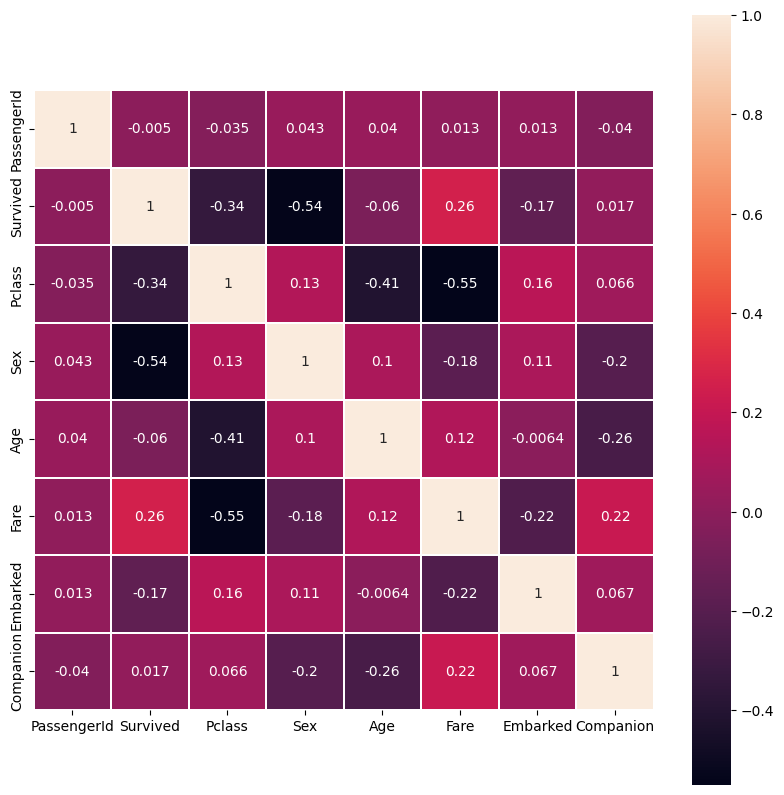

In [60]:
# Correlation Heatmap

plt.figure(figsize=(10,10))
sns.heatmap(df_train.astype(float).corr(),linewidths=0.1, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [61]:
# From the Heatmap above, we can see that there is a bad correalation between Age, Fare, Pclass, Sex, Survived

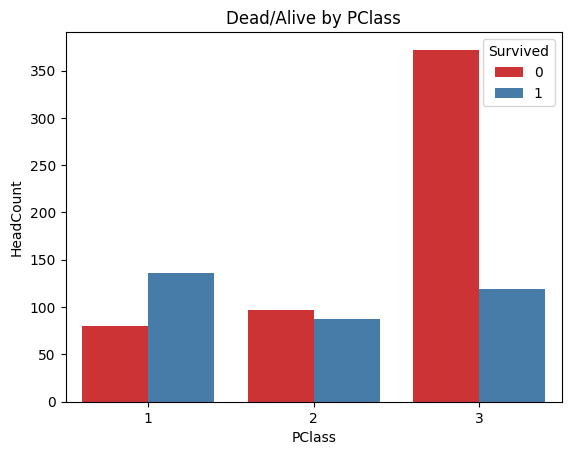

In [62]:
# Survival/Class

ax = sns.countplot(x = 'Pclass', hue = 'Survived', palette = 'Set1', data = df_train)
ax.set(title = 'Dead/Alive by PClass', 
       xlabel = 'PClass', ylabel = 'HeadCount')
plt.show()

In [63]:
# As per the above plot, the highest survivability goes to 1st class
# the highest mortality rate goes to 3rd class

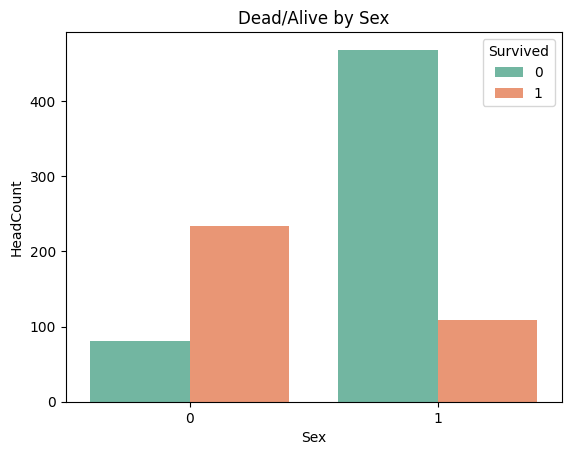

In [64]:
# Survival by Sex
  
ax = sns.countplot(x = 'Sex', hue = 'Survived', palette = 'Set2', data = df_train)
ax.set(title = 'Dead/Alive by Sex', 
       xlabel = 'Sex', ylabel='HeadCount')
plt.show()

In [65]:
# 0-Female
# 1-Male
# Females have a much higher survivabilty rate than males

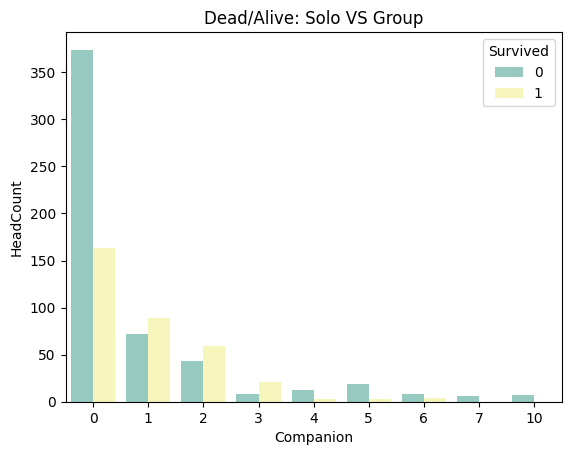

In [77]:
# Survival wrt Companion

ax = sns.countplot(x = 'Companion', hue = 'Survived', palette = 'Set3', data = df_train)
ax.set(title = 'Dead/Alive: Solo VS Group', 
       xlabel = 'Companion', ylabel='HeadCount')
plt.show()

In [ ]:
# Most people do not have any companions, and most of them died. Thoe who have 1-3 in their group were much more likely to survive

## Machine Learning

In [98]:
# Data Modelling

In [67]:
X_train = df_train.drop("Survived", axis=1) 
Y_train = df_train["Survived"] 
X_test  = df_test 
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (417, 7))

### Each model will have subsequent K-fold cross Validation, k=10

In [68]:
# Random Forest

random_forest = RandomForestClassifier(criterion='gini',
    n_estimators=700, 
    min_samples_split=10, 
    min_samples_leaf=1, 
    max_features='auto', 
    oob_score=True, 
    random_state=1,
    n_jobs=-1) 

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test) 

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2) 
acc_random_forest  

c:\Users\user\anaconda3\envs\name-py10\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


92.14

In [81]:
rf = RandomForestClassifier(n_estimators=700)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77777778 0.78651685 0.75280899 0.79775281 0.88764045 0.85393258
 0.85393258 0.80898876 0.82022472 0.82022472]
Mean: 0.8159800249687889
Standard Deviation: 0.03840732207728619


In [ ]:
# Initial Run - 92.14
# X-Validation shows that it has an accuracy of 81.5% with deviation of 3.8%

In [69]:
# Log Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

c:\Users\user\anaconda3\envs\name-py10\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


80.25

In [84]:
rf = LogisticRegression()
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.78888889 0.80898876 0.76404494 0.84269663 0.80898876 0.7752809
 0.80898876 0.79775281 0.83146067 0.79775281]
Mean: 0.8024843945068664
Standard Deviation: 0.02242945427644189


c:\Users\user\anaconda3\envs\name-py10\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\anaconda3\envs\name-py10\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [ ]:
# Initial Run - 80.25
# X-Validation shows that it has an accuracy of 80.24% with deviation of 2.24%

In [89]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 6) 
knn.fit(X_train, Y_train) 
 
Y_pred = knn.predict(X_test)  

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

73.51

In [90]:
rf = KNeighborsClassifier(n_neighbors = 6)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.48888889 0.62921348 0.49438202 0.46067416 0.4494382  0.52808989
 0.50561798 0.50561798 0.68539326 0.65168539]
Mean: 0.5399001248439451
Standard Deviation: 0.07953945202686367


In [ ]:
# Initial Run - 73.51
# X-Validation shows that it has an accuracy of 54% with deviation of 8%
# Hence this model isnt very good

In [78]:
# Naive Bayes

gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  

Y_pred = gaussian.predict(X_test)  

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.35

In [91]:
rf = GaussianNB() 
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.71111111 0.76404494 0.7752809  0.79775281 0.79775281 0.7752809
 0.82022472 0.83146067 0.7752809  0.82022472]
Mean: 0.7868414481897628
Standard Deviation: 0.0333370363637702


In [ ]:
# Initial Run - 79.35
# X-Validation shows that it has an accuracy of 78.7% with deviation of 3.33%

In [72]:
# SVM

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

c:\Users\user\anaconda3\envs\name-py10\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


78.34

In [92]:
rf = LinearSVC()
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

c:\Users\user\anaconda3\envs\name-py10\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\user\anaconda3\envs\name-py10\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\user\anaconda3\envs\name-py10\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\user\anaconda3\envs\name-py10\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\user\anaconda3\envs\name-py10\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\user\anaconda3\envs\name-py10\lib\site-packages\sklearn\svm\_

Scores: [0.71111111 0.80898876 0.65168539 0.84269663 0.7752809  0.60674157
 0.80898876 0.78651685 0.70786517 0.79775281]
Mean: 0.7497627965043694
Standard Deviation: 0.07299370843569129


c:\Users\user\anaconda3\envs\name-py10\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\user\anaconda3\envs\name-py10\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [97]:
# Initial Run - 78.34
# X-Validation shows that it has an accuracy of 75% with deviation of 7.3%

In [96]:
# Model's Performances compared

In [95]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.14,Random Forest
80.25,Logistic Regression
79.35,Naive Bayes
78.34,Support Vector Machines
73.51,KNN
